# Домашняя работа №2

In [423]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import derivative, electrocardiogram
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks
import numpy as np
from scipy.optimize import approx_fprime
from numpy import arange, sin, pi, cos
from sympy import *
from pprint import pprint

### Задание 1

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$


### Решение

$f'(x) = 2sin(2x+1)*cos(2x+1)*2 = 4sin(2x+1)*cos(2x+1) = sin(\alpha)+cos(\alpha) = sin(2\alpha) = 4sin(4x+2)$

$f''(x) = 4sin(2x+1)*cos(2x+1) = (sin(2x+1)*cos(2x+1))' = (cos(2x+1))' * sin(2x+1) + cos(2x+1)*(sin(2x+1))'=(-2sin(2x+1))*sin(2x+1)+cos(2x+1)*2cos(2x+1)||*4 = -8sin^2(2x+1)+8cos^2(2x+1)$

$cos(2x+1)' = cos(2x+1)' * (2x+1)' = -2sin(2x+1)* 2$

$sin(2x+1)' = sin(2x+1)' * (2x+1)' = 2 * cos(2x+1) $

In [428]:
x= symbols('x')
diff1 = diff(sin((2*x)+1)**2,x)
diff1

4*sin(2*x + 1)*cos(2*x + 1)

In [430]:
diff2 = diff(sin((2*x)+1)**2, x,2)
diff2

8*(-sin(2*x + 1)**2 + cos(2*x + 1)**2)

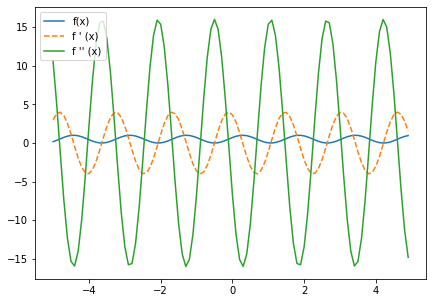

In [413]:
fig = plt.figure(figsize=(7, 5))
x=arange(-5,5,0.1)
plt.plot(x, sin((2*x)+1)**2)
plt.plot(x, 4*sin(4*x+2), '--')
plt.plot(x, 16*cos((4*x)+2))
plt.legend(["f(x)", "f ' (x)", "f '' (x)"])


### Задание 2: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

### решение

по иск 


$f(1,2) = 2y^3(x^2)'+(1/x)'+y^2(x)'+(7)' = 2y^3*2x+(-1/x^2)+y^2 = 4xy^3-(1/x^2)+y^2 = 4*1*2^3-1+4=35$

по игрик

$f(1,2) = 2x^2(y^3)'+1/x+(y^2)'x+(7)' = 2x^2*3y^2+1/x+2xy = 6x^2y^2+2xy = 6*4+2*2 = 28$

In [356]:
x, y = symbols('x y ')
zx = diff(2*x**2*y**3 + 1/x + (y**2)*x + 7, x)
zx
print(zx) 
zy = diff(2*x**2*y**3 + 1/x + (y**2)*x + 7, y)
print(zy)


4*x*y**3 + y**2 - 1/x**2
6*x**2*y**2 + 2*x*y


In [436]:
x= 1
y = 2
z = 4*x*y**3 + y**2 - 1/x**2
z2 = 6*x**2*y**2 + 2*x*y
print(z, z2)   

35.0 28


In [437]:
def func(x, c0, c1, c2):
    return c0 *x[0]**2*x[1]**3 + c1 * 1/x[0] + c2 * (x[1]**2)*x[0]

In [440]:
x = np.array([1,2])
c0, c1, c2 = (2, 1, 1)
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps], c0, c1, c2)

array([35.00000024, 28.00000024])

### Задание 3

Найти точки минимума в следующих данных (колонка height):

In [242]:
import pandas as pd
data = pd.read_csv('video.csv')
data.head()

,sec,x1,y1,x2,y2,height
0,0,875,1411,1008,1835,414
1,1,883,1377,1057,1873,417
2,2,862,1397,1066,1872,417
3,3,878,1394,1046,1875,417
4,4,910,1378,1070,1866,417


Text(0, 0.5, 'изменение высоты по времени')

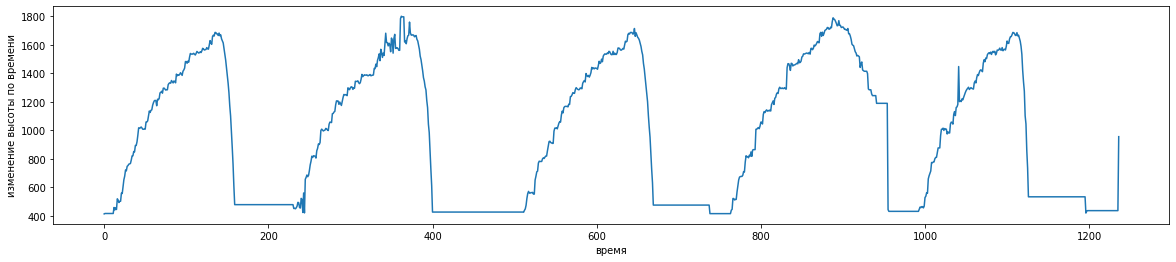

In [247]:
plt.figure(figsize=(20,4))
plt.plot(data.height)
plt.xlabel('время')
plt.ylabel('изменение высоты по времени')

In [254]:
list_ids = data.sec.unique()
list_derivatives = []
for i in range(len(list_ids)-1):
    sec_id_next = list_ids[i+1]
    sec_id = list_ids[i]
    height = list(data.loc[data.sec==sec_id, 'height'])[0]
    next_height = list(data.loc[data.sec==sec_id_next, 'height'])[0]
    list_derivatives.append((next_height - height)/(sec_id_next - sec_id))
list_derivatives.append(list_derivatives[-1])
data['first_derivative'] = list_derivatives

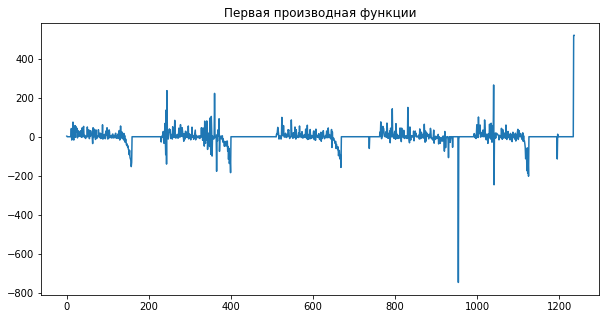

In [314]:
fig, axs = plt.subplots(1,figsize=(10,5))
axs.set_title('Первая производная функции')
axs.plot([i for i in range(0, len(data['first_derivative']))], data['first_derivative'])


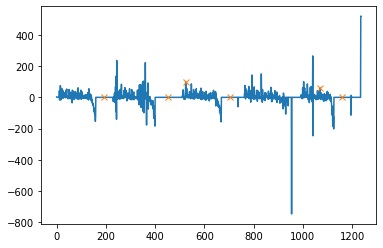

In [282]:
peaks, _ = find_peaks(data.first_derivative, prominence=0, width=20)
plt.plot(data['first_derivative'])
plt.plot(peaks, data.first_derivative[peaks], "x")
plt.show()

In [305]:
data['height'] = data['height'] *(-1)
data.head()

,sec,x1,y1,x2,y2,height,first_derivative
0,0,875,1411,1008,1835,-414,3.0
1,1,883,1377,1057,1873,-417,0.0
2,2,862,1397,1066,1872,-417,0.0
3,3,878,1394,1046,1875,-417,0.0
4,4,910,1378,1070,1866,-417,0.0


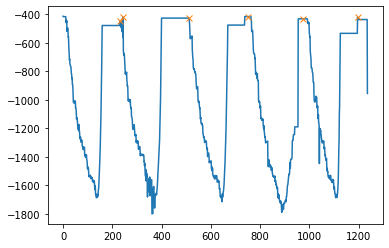

In [316]:
peaks, _ = find_peaks(data.height, prominence=1, width=20)
plt.plot(data.height)
plt.plot(peaks, data.height[peaks], "x")
plt.show()

In [326]:
data.height[peaks]*(-1)

233     450
244     421
511     426
750     416
974     432
1196    420
Name: height, dtype: int64